![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Vector Quantization

## Sec 14.3.9 of ESL

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
from skimage import io
from skimage import data
from skimage.color import rgb2gray

In [52]:
coffee = data.coffee()
img = rgb2gray(coffee)
m, n = img.shape
print(m,n,type(img[0,0]))
print(img.min(),img.max())

400 600 <class 'numpy.float64'>
0.0002827450980392157 1.0


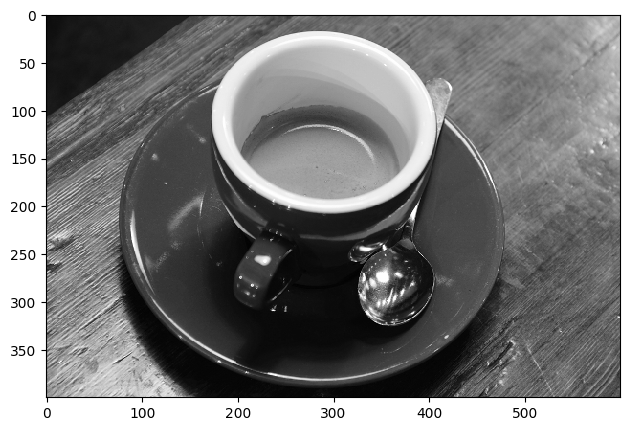

In [54]:
io.imshow(img)

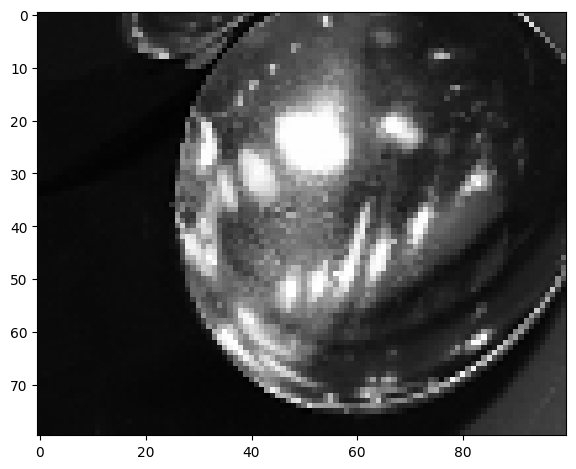

In [55]:
blk = img[250:330,300:400]
blk
io.imshow(blk)

Some utility functions

In [56]:
from skimage.util import view_as_windows as viewW
from skimage.util import view_as_blocks as viewB

def im2col_sliding_strided_v2(A, block_size, stepsize=1):
    a, b = block_size
    return viewW(A, (a,b)).reshape(-1,a*b).T[:,::stepsize]

def im2col_distinct(B, block_size):
    a, b = block_size
    return viewB(B, (a,b)).reshape(-1,a*b).T#[:,::stepsize]

def col2im_sliding(B, block_size, image_size):
    a, b = block_size
    m, n = image_size
    return B.reshape(n-b+1,m-a+1).T 

def col2im_distinct(A, block_size, image_size):
    a, b = block_size
    m, n = image_size
    B = A.reshape((m//a,n//b,a,b)) #C = A.reshape((3,2,2,2))
    return B.transpose([0,2,1,3]).reshape(m,n)#B.reshape(nn-n+1,mm-m+1).T         

In [57]:
bs = [2, 2]
x = im2col_distinct(img,bs) 
print(x.shape, x.shape[0]*x.shape[1], m*n/4)

(4, 60000) 240000 60000.0


In [58]:
k = 4
clustering = KMeans(n_clusters=k, random_state=0).fit(x.T)
# clustering = KMedoids(n_clusters=k, random_state=0).fit(x.T)

In [59]:
print(clustering.cluster_centers_.shape)
labels = clustering.labels_
print(labels.shape)
cluster_centers = clustering.cluster_centers_
seg_img_centers = cluster_centers[labels]

(4, 4)
(60000,)


In [60]:
c

array([[0.08964681, 0.08964376, 0.0891365 , 0.08983376],
       [0.52257102, 0.52450528, 0.52411545, 0.52291897],
       [0.31711779, 0.31502177, 0.31424693, 0.31655577],
       [0.79977116, 0.80243902, 0.80349648, 0.80130889]])

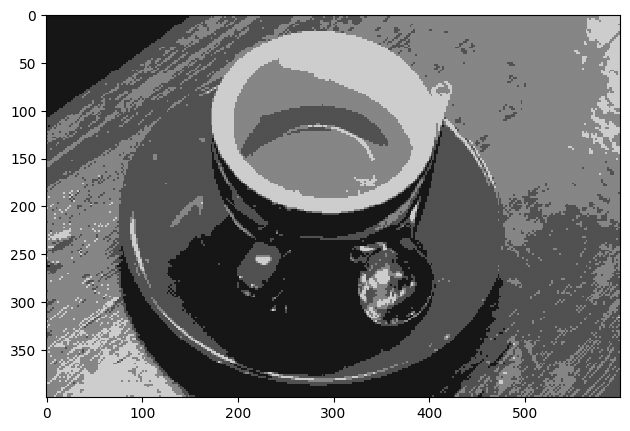

In [61]:
comp_img = col2im_distinct(seg_img_centers,bs,[m,n])
# print(y.shape,imc.shape,type(imc[0,0]))
io.imshow(comp_img)

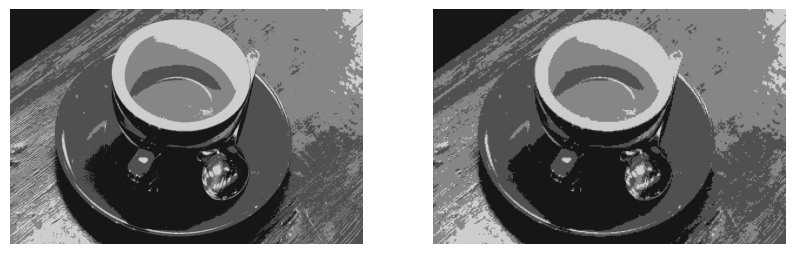

In [62]:
X = img.reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

## New approach for replacing each pixel 
# with corresponding cluster center

seg_img_centers = cluster_centers[labels]
seg_img_centers = seg_img_centers.reshape(img.shape)

plt.figure(figsize=(10, 5))
# plt.subplot(1, 3, 1)
# plt.axis("off")
# plt.imshow(img, cmap="gray")

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(seg_img_centers, cmap="gray", vmin=0, vmax=1)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(comp_img, cmap="gray", vmin=0, vmax=1)

In [63]:
A = np.arange(4*6).reshape(4,6)
patch_arr = view_as_blocks(A, (2,2))
print(A)
print(patch_arr.shape)
patch_arr

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
(2, 3, 2, 2)


array([[[[ 0,  1],
         [ 6,  7]],

        [[ 2,  3],
         [ 8,  9]],

        [[ 4,  5],
         [10, 11]]],


       [[[12, 13],
         [18, 19]],

        [[14, 15],
         [20, 21]],

        [[16, 17],
         [22, 23]]]])

In [64]:
B = im2col_distinct(A,[2, 2])
print(A)
print(B)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  2  4 12 14 16]
 [ 1  3  5 13 15 17]
 [ 6  8 10 18 20 22]
 [ 7  9 11 19 21 23]]


In [65]:
C = col2im_distinct(B.T,[2, 2], [4, 6])
C

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])